In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
base_dir = r'D:\Anki\Python Projects\Workspace\NUS project\FRUIT-16K'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_fbanana_dir = os.path.join(train_dir, 'F_Banana')  
train_flemon_dir = os.path.join(train_dir, 'F_Lemon') 
train_flulo_dir = os.path.join(train_dir,'F_Lulo')
train_fmango_dir = os.path.join(train_dir, 'F_Mango')  
train_forange_dir = os.path.join(train_dir, 'F_Orange') 
train_fstrawberry_dir = os.path.join(train_dir,'F_Strawberry')
train_ftarmarillo_dir = os.path.join(train_dir,'F_Tarmarillo')
train_ftomato_dir = os.path.join(train_dir,'F_Tomato')


test_fbanana_dir = os.path.join(test_dir, 'F_Banana')  
test_flemon_dir = os.path.join(test_dir, 'F_Lemon') 
test_flulo_dir = os.path.join(test_dir,'F_Lulo')
test_fmango_dir = os.path.join(test_dir, 'F_Mango')  
test_forange_dir = os.path.join(test_dir, 'F_Orange') 
test_fstrawberry_dir = os.path.join(test_dir,'F_Strawberry')
test_ftarmarillo_dir = os.path.join(test_dir,'F_Tarmarillo')
test_ftomato_dir = os.path.join(test_dir,'F_Tomato')

In [4]:
total_train = total_test = 0

for i in os.listdir(train_dir):
    total_train += len(os.listdir(train_dir + "\\"+i))

for i in os.listdir(test_dir):
    total_test += len(os.listdir(test_dir + "\\" + i))

print("Total training images:", total_train)
print("Total test images:", total_test)

Total training images: 14400
Total test images: 1600


In [5]:
BATCH_SIZE = 32  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels


In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

Found 14400 images belonging to 16 classes.


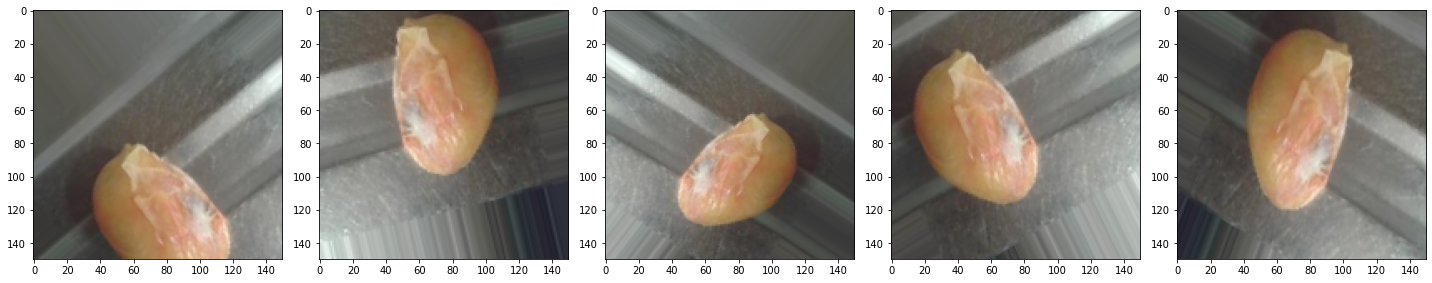

Found 1600 images belonging to 16 classes.


In [7]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical')
augmented_img = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_img)

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='categorical')

In [8]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [9]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3,3) , activation = 'relu', input_shape = (IMG_SHAPE,IMG_SHAPE,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(16,activation  = 'softmax') # We could also use 'sigmoid' function. REMEMBER to use 'binary_crossentropy' loss func.
])




In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
callback2 = tf.keras.callbacks.LearningRateScheduler(scheduler)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs",update_freq=1)

In [11]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False),
               optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.900,
    beta_2=0.999,
    epsilon=1e-07),
    metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                        

In [12]:
epochs=25
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test/ float(BATCH_SIZE))),
    callbacks=[callback,tensorboard_callback]
)

# history = model.fit(
#     train_data_gen,
#     epochs=epochs,
#     validation_data=test_data_gen
# )

Epoch 1/25
450/450 [==============================] - 109s 225ms/step - loss: 1.4638 - accuracy: 0.4935 - val_loss: 1.6439 - val_accuracy: 0.4356
Epoch 2/25
450/450 [==============================] - 92s 204ms/step - loss: 0.7303 - accuracy: 0.7399 - val_loss: 0.8005 - val_accuracy: 0.6831
Epoch 3/25
 17/450 [>.............................] - ETA: 1:54 - loss: 0.6180 - accuracy: 0.7812

In [ ]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

test_loss = history.history['val_loss']
loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='test Loss')
plt.legend(loc='upper right')
plt.title('Training and test Loss')
plt.show()


In [ ]:
model.evaluate(test_data_gen)